<a href="https://colab.research.google.com/github/Lucas-300/AnaliseID/blob/main/Projeto_An%C3%A1liseCart%C3%A3oID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

O objetivo deste projeto é detectar se há ou não  adulteração na apresentação de cartão de identificação(crachá) usando visão computacional. Este projeto ajudará diferentes organizações a detectar se o Id, ou seja, o cartã fornecido por seus funcionários ou clientes é a um cartão adulterado ou não.

In [ ]:

from skimage.metrics import structural_similarity
import imutils
import cv2
from PIL import Image
import requests

In [ ]:
#criando um diretorio de armazenamento de imagens
#

!mkdir pan_card_tampering
!mkdir pan_card_tampering/image

In [ ]:

from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from PIL import Image
original = Image.open("/content/drive/MyDrive/card.teste/nova-carteira-de-identidade-600x400-1.jpeg")
teste = Image.open("/content/drive/MyDrive/card.teste/identidade.png")

In [ ]:
#open image and display
#original = Image.open(requests.get('https://www.thestatesman.com/wp-content/uploads/2019/07/pan-card.jpg', stream=True).raw)
#tampered = Image.open(requests.get('https://assets1.cleartax-cdn.com/s/img/20170526124335/Pan4.png', stream=True).raw)

In [ ]:
#Formato dos pontos da imagem
print("Teste image format:", original.format)
print("Teste image format:", teste.format)
#Tamanho da imagem em pixel
print("Original Tamanho",original.size)
print("Teste Tamanho", teste.size)

Teste image format: JPEG
Teste image format: PNG
Original Tamanho (600, 400)
Teste Tamanho (848, 477)


In [ ]:
#Redimencionando imagem

original = original.resize((250,160))
print(original.size)
#salvando na pasta
original.save('pan_card_tampering/image/original.png')
#Redimencionando
teste = teste.resize((250,160))
print(teste.size)
#Salvando
teste.save('pan_card_tampering/image/tampered.png')



(250, 160)
(250, 160)


###Verificando o formato e tamanho da imagem original e adulterada

In [ ]:
## Altere o tipo de imagem, se necessário, de png para jpg
teste = Image.open('pan_card_tampering/image/tampered.png')
teste.save('pan_card_tampering/image/tampered.png')#pode fazer png para jpg

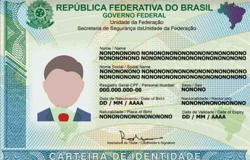

In [ ]:
#vISUALIZAR IMAGEM original
original

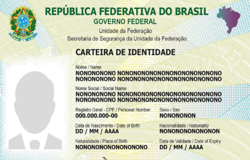

In [ ]:
#visualizar tampered/ imagem fornecida pelo usuario
teste


In [ ]:
#Carregando as duas imagens

original = cv2.imread('pan_card_tampering/image/original.png')
teste = cv2.imread('pan_card_tampering/image/tampered.png')

###Convertendo imagens em escala de cinza usando opencv. Como no processamento de imagens muitas aplicações não nos ajudam a identificar o importante, as bordas das imagens coloridas também as imagens coloridas são um pouco complexas de entender por máquina porque elas têm 3 canais enquanto a escala de cinza tem apenas 1 canal.

In [ ]:
#Converter a imagem para escalas de cinza

original_gray = cv2.cvtColor (original, cv2.COLOR_BGR2GRAY)
teste_gray = cv2.cvtColor (teste, cv2.COLOR_BGR2GRAY)

#### Convertendo imagens em tons de cinza usando opencv. Como no processamento de imagens muitas aplicações não nos ajudam a identificar o importante, as bordas das imagens coloridas também as imagens coloridas são um pouco complexas de entender por máquina porque elas têm 3 canais enquanto a escala de cinza tem apenas 1 canal.


In [ ]:
## Calcula o índice de similaridade estrutural (SSIM) entre as duas imagens, garantindo que a imagem de diferença seja retornada
(score, diff) = structural_similarity(original_gray , teste_gray, full=True)
diff= (diff * 255).astype("uint8")
print("SSIM: {} ".format(score))


SSIM: 0.10552668977838588 


In [ ]:
# Calculando limites e contornos

thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

aqui estamos usando a função de limite da visão computacional que aplica um limite adaptativo à imagem que é armazenada no array de formulário. Essa função transforma a imagem em tons de cinza em uma imagem inária usando uma fórmula matemática.

Encontrar contornos funciona em imagem binária e recuperar os contornos. Esses contornos são uma ferramenta útil para análise e reconhecimento de formas. Pegar contornos captura o valor apropriado dos contornos.


In [ ]:
for c in cnts:
    # aplicando contornos na imagem
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(original, (x, y), (x + w, y + h), (0, 0, 255), 2)
    cv2.rectangle(teste, (x, y), (x + w, y + h), (0, 0, 255), 2)

O retângulo delimitador ajuda a encontrar a proporção entre a largura e a altura do retângulo delimitador do objeto. calculamos a caixa delimitadora do contorno e, em seguida, desenhamos a caixa delimitadora em ambas as imagens de entrada para representar onde as duas imagens são diferentes ou não.


Original Format Image


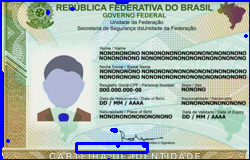

In [ ]:
#Original com Contorno

print('Original Format Image')
Image.fromarray(original)

Original format Image


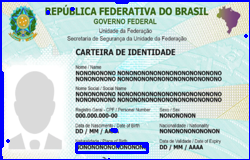

In [ ]:
#Imagem de teste com contorno

print("Original format Image")
Image.fromarray(teste)

Different Image


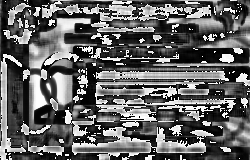

In [ ]:
#Imagem de diferença de Diplay com preto
print('Different Image')
Image.fromarray(diff)

Diferente Imagem


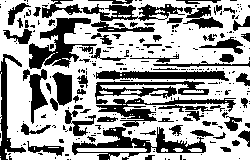

In [ ]:
#Exibir imagem de limite com branco
print("Diferente Imagem")
Image.fromarray(thresh)

# Súmario

Descobrir a semelhança estrutural das imagens nos ajudou a encontrar a diferença ou semelhança na forma das imagens. Da mesma forma, descobrir o limite e os contornos com base nesses limites para as imagens convertidas em binário em tons de cinza também nos ajudou na análise e reconhecimento de formas.
Como nosso SSIM é de ~10,5%, podemos dizer que a imagem fornecida pelo usuário é falsa ou adulterada.
Por fim, visualizamos as diferenças e semelhanças entre as imagens usando a exibição das imagens com contornos, diferenças e limites.

# Escopo

Este projeto pode ser usado em diferentes organizações onde os clientes ou usuários precisam fornecer qualquer tipo de id para serem verificados. A organização pode usar este projeto para descobrir se o ID é original ou falso. Da mesma forma, isso pode ser usado para qualquer tipo de ID, como adhar, id de eleitor, etc.